In [1]:
import pandas as pd
import glob
import os
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import math
import seaborn as sns
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("./Assignment3-TrainingData-ModifiedV2.csv")

In [14]:
def elbow_method(attributes, kMax, visualise):
    distToCluster = []
    x_ticks = []
    
    for no_of_clusters in range(1, kMax):
        k_model = KMeans(n_clusters=no_of_clusters)
        k_model.fit(df[attributes])
        distToCluster.append(k_model.inertia_)
        x_ticks.append(no_of_clusters)
        
    if visualise:
        plt.plot(distToCluster)
        plt.xticks(list(range(0, kMax-1)), x_ticks)
        plt.title(f"{attributes[0]} and {attributes[1]} Clusters")
        plt.xlabel(attributes[1])
        plt.ylabel(attributes[0])
        plt.grid(True)
        plt.show()
    else:
        distances = []
        x = 1
        m = (distToCluster[len(distToCluster)-1] - distToCluster[0]) / ((kMax-1) - 1)
        for y in distToCluster:
            distances.append(abs((m*x - y + distToCluster[0]) / math.sqrt(1 + m*m*x*x)))
            x += 1
        return distances.index(max(distances))+1

In [3]:
def plotClusters(attributes, k):
    kmeans = KMeans(n_clusters=k).fit(df[attributes])

    plt.scatter(df[attributes[1]], df[attributes[0]], c= kmeans.labels_.astype(float), s=50, alpha=0.5, cmap="hsv")
    plt.title(f"{attributes[0]} and {attributes[1]} Clusters")
    plt.xlabel(attributes[1])
    plt.ylabel(attributes[0])
    plt.show()

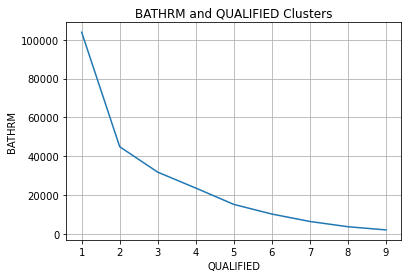

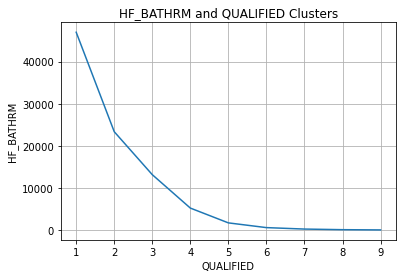

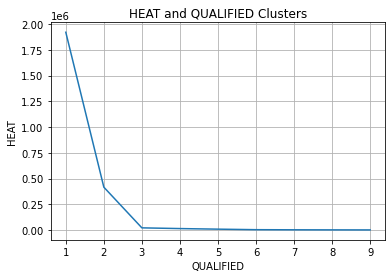

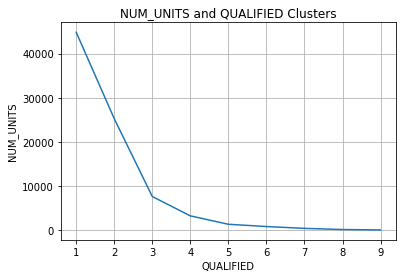

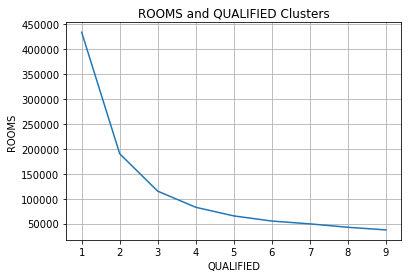

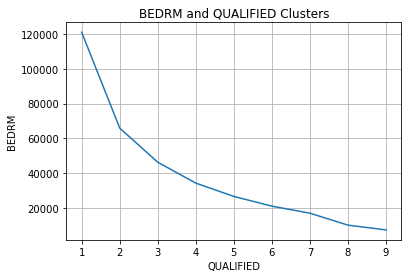

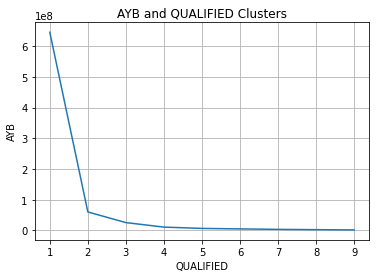

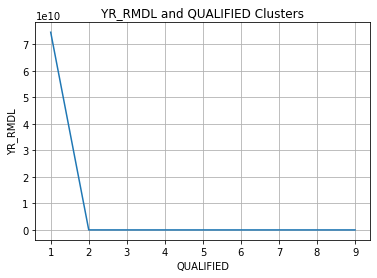

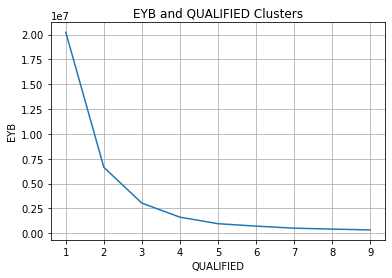

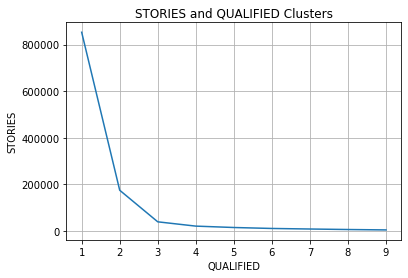

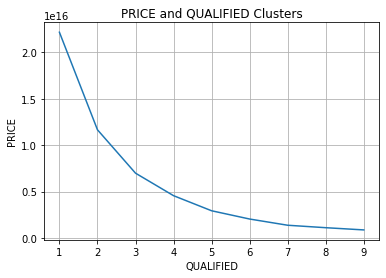

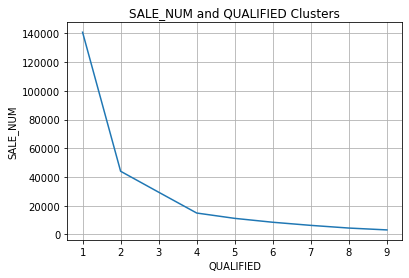

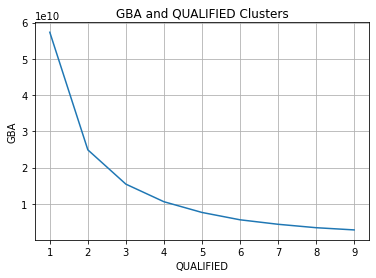

<ipython-input-26-a68ce3107074>:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-26-a68ce3107074>:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])


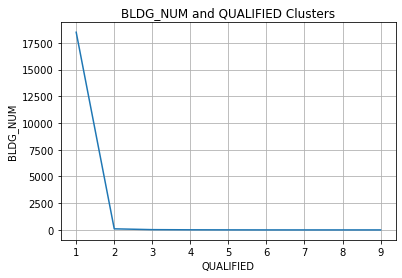

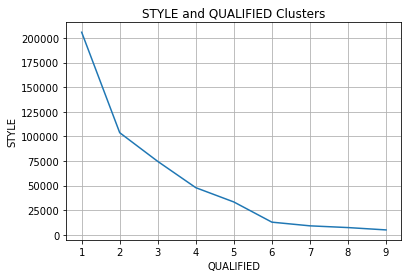

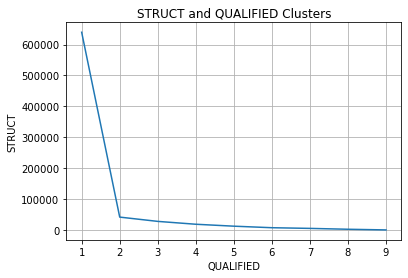

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

In [27]:
attributes = df.columns
types = df.dtypes.values
for y in range(0, len(attributes)):
    if types[y] == "int64" or types[y] == "float64":
        elbow_method([attributes[y], "QUALIFIED"], 10, True)

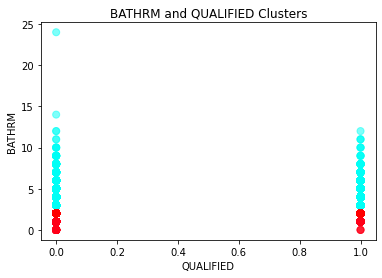

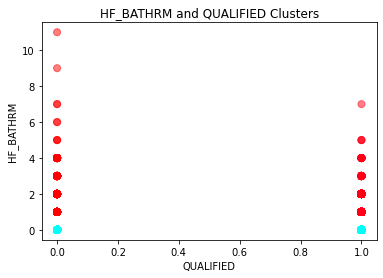

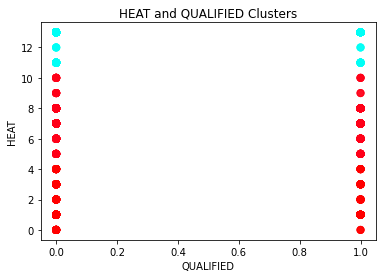

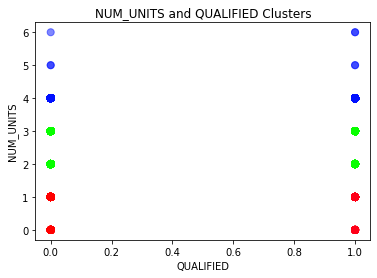

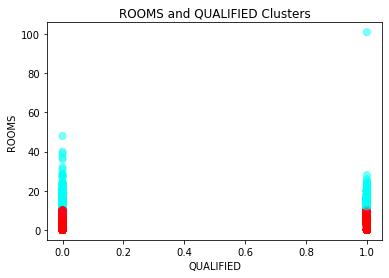

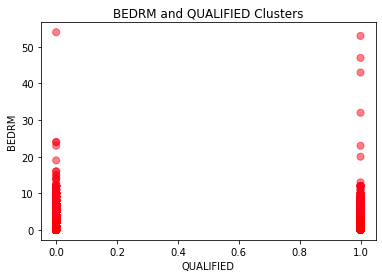

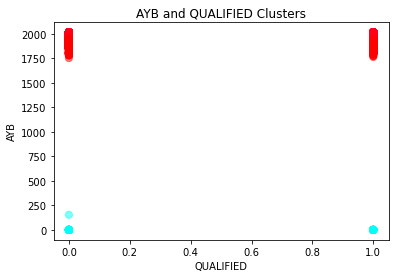

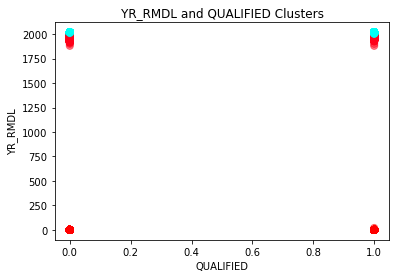

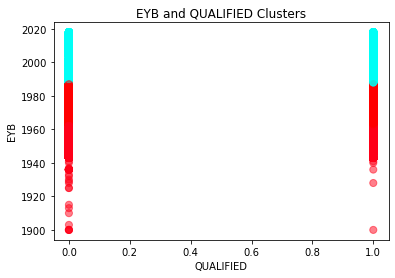

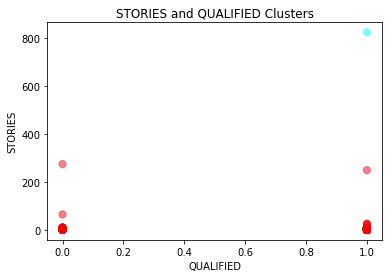

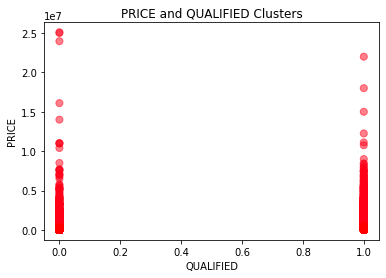

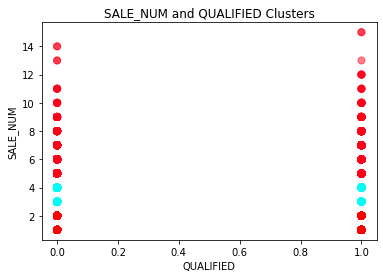

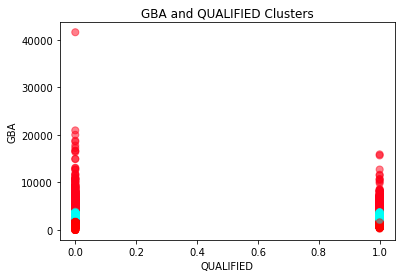

<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])


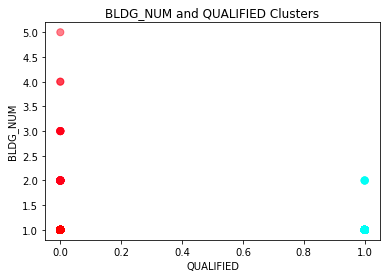

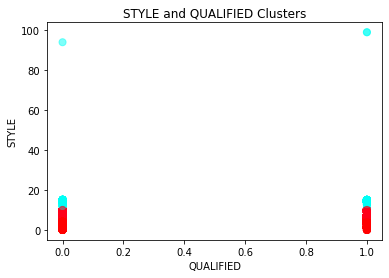

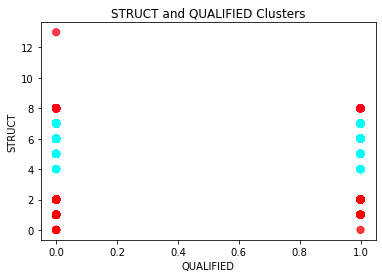

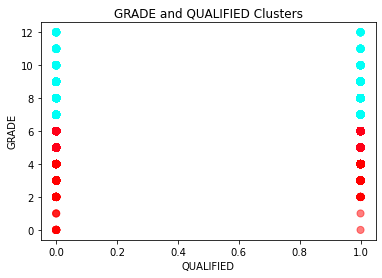

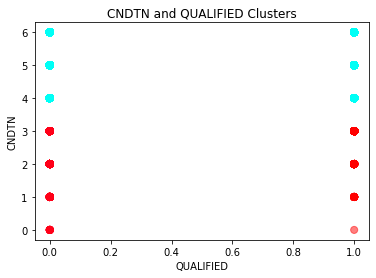

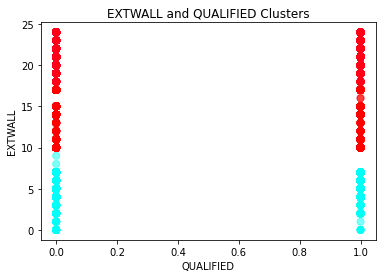

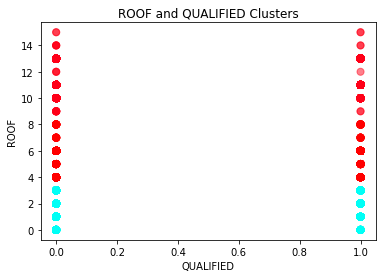

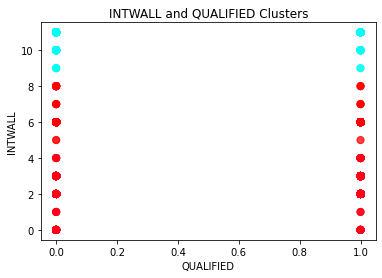

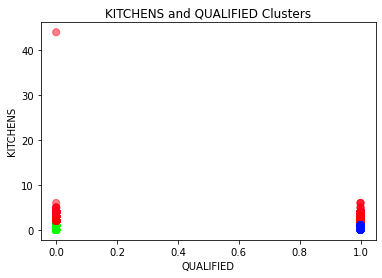

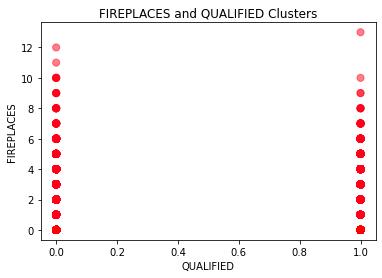

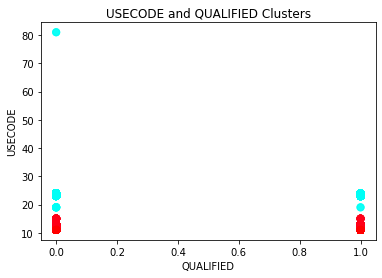

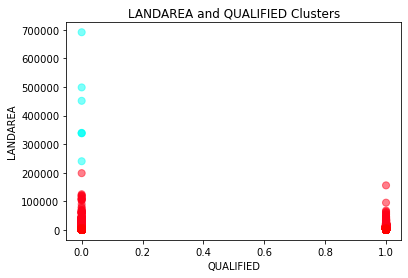

<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: Convergenc

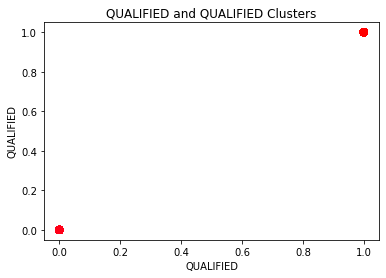

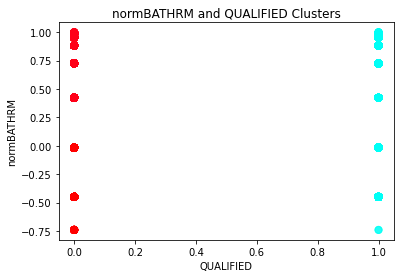

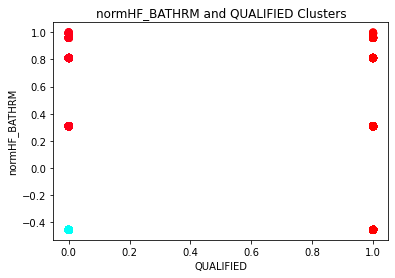

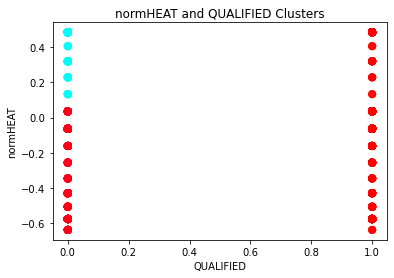

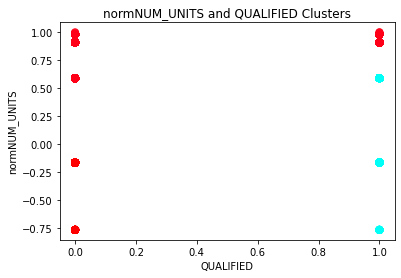

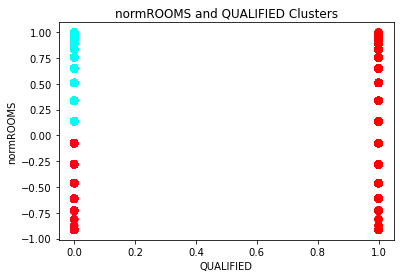

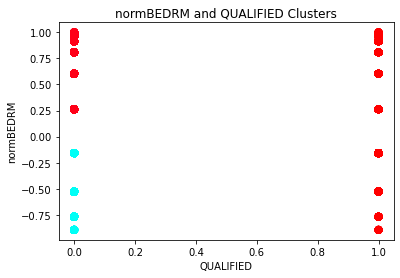

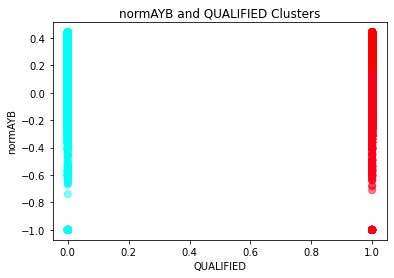

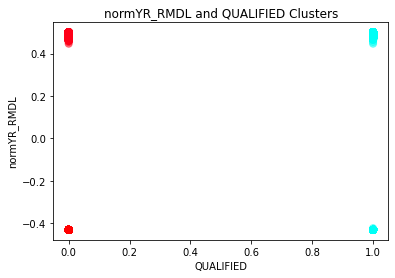

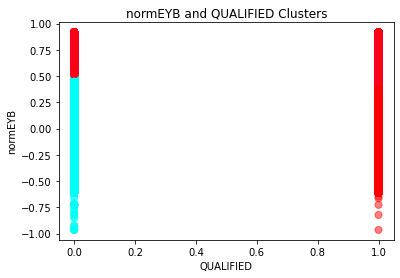

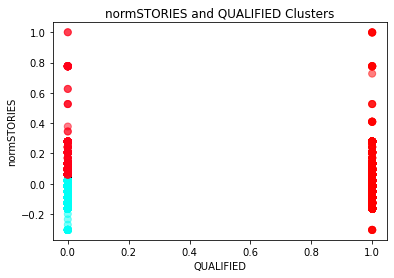

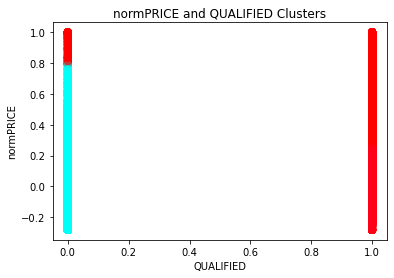

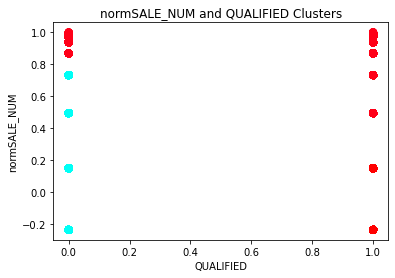

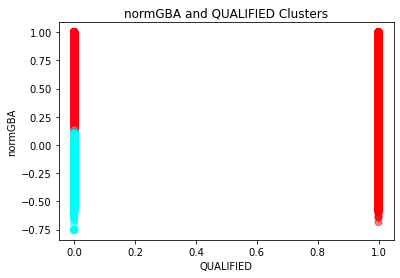

<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])


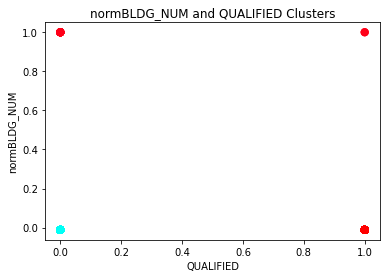

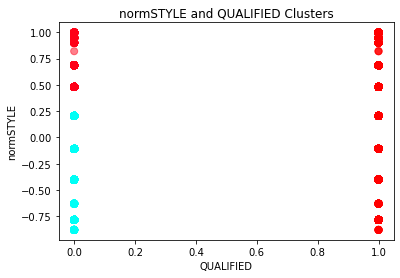

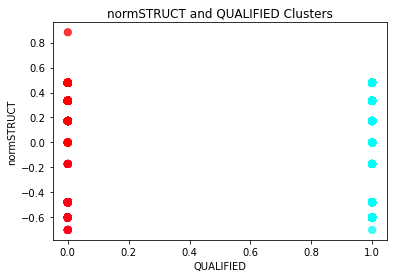

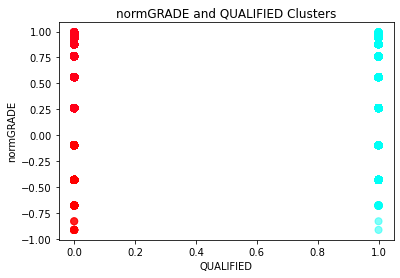

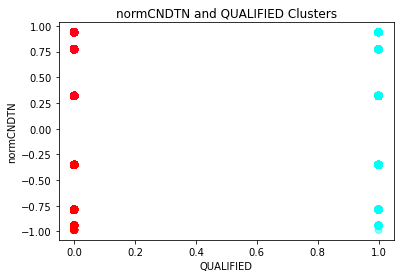

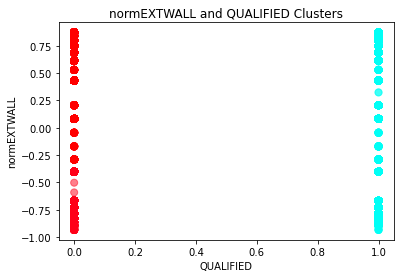

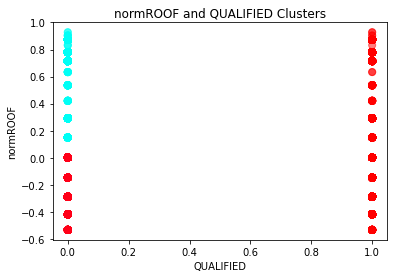

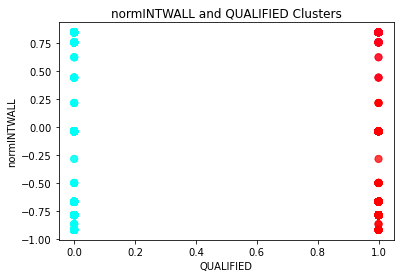

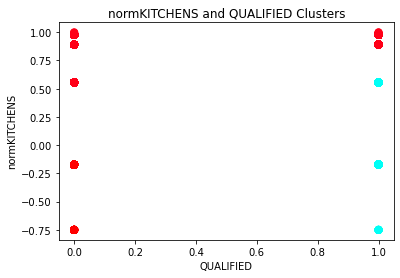

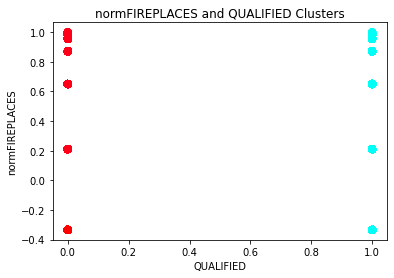

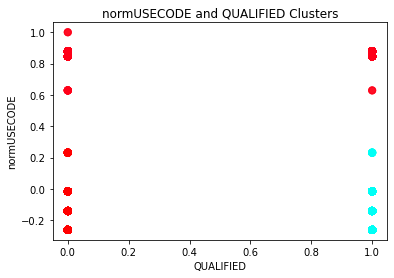

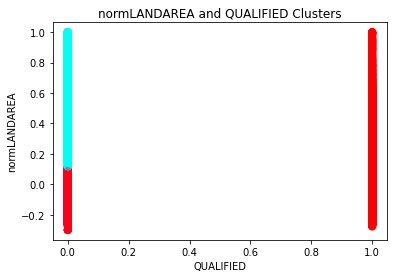

<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  k_model.fit(df[attributes])
<ipython-input-14-3a1feaabfce5>:7: Convergenc

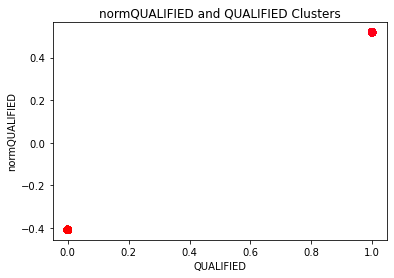

In [20]:
attributes = df.columns
types = df.dtypes.values
for y in range(0, len(attributes)):
    if types[y] == "int64" or types[y] == "float64":
        plotClusters([attributes[y], "QUALIFIED"], elbow_method([attributes[y], "QUALIFIED"], 10, False)+1)

In [4]:
attributes = df.columns
types = df.dtypes.values
for y in range(0, len(attributes)):
    if types[y] == "int64" or types[y] == "float64":
        newColumn = []
        mean = df[attributes[y]].mean()
        std = df[attributes[y]].std()
        
        for x in df[attributes[y]].values:
            V = (x - mean) / std
            A = (1 - math.exp(-V)) / (1 + math.exp(-V))
            newColumn.append(A)

        df["norm"+attributes[y]] = newColumn

In [22]:
# attributes = df.columns
# for y in range(len(attributes)-1, 30, -1):
#     plotClusters([attributes[y], "QUALIFIED"], elbow_method([attributes[y], "QUALIFIED"], 10, False)+1)

In [15]:
print(elbow_method(["NUM_UNITS", "QUALIFIED"], 10, False))

3


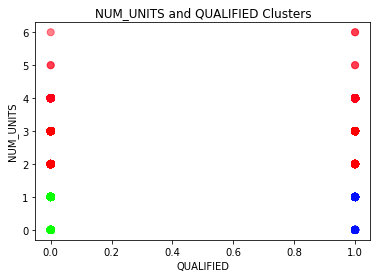

In [17]:
plotClusters(["NUM_UNITS", "QUALIFIED"], 4)